Chargement des données

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import pickle
import scipy.signal


my_data = np.genfromtxt('../Supelec_2012_SIR_Spectral_Analysis_EA_v001.csv', delimiter=',')
# c'est plus rapide de charger des pickle que des csv
a="""
with open("data.pickle", "wb") as file:
    pickle.dump(my_data, file)

with open("data.pickle", "rb") as file:
    my_data = pickle.load(file)
"""

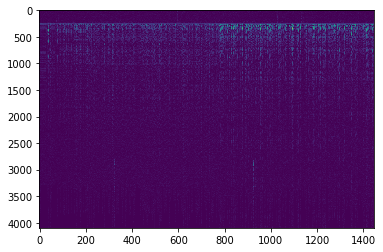

In [2]:
plt.figure()
plt.imshow(np.abs(my_data), aspect="auto")
plt.show()

Constantes

In [ ]:
# paramètres du signal
Te = 10**(-6)
Fe = 1/Te

def make_cos_window(te, Tcut, length):
    dT=Tcut/16
    len1 = int((Tcut-dT)/te)
    len2 = int(dT/te)
    len3 = length - len1 - 2*len2
    cospart = np.cos(np.linspace(0, np.pi, len2))*0.5 + 0.5
    return np.concatenate([
        cospart[::-1],
        np.ones(len1),
        cospart,
        np.zeros(len3),
    ])

# fenêtre cosinus
cos_window = make_cos_window(Te, 0.6e-3, 4096)
# coefficients pour filtre de chebychev
chebyfilt = scipy.signal.cheby2(2, 40, [2e3, 2e5], fs=Fe, btype='bandpass', output='sos')


Aide à l'affichage

In [ ]:
def get_fft(sig, te, absolute=True):
    N = len(sig)//2
    signal_f = np.fft.fft(sig)[:N]
    if absolute:
        signal_f = abs(signal_f)
    freqs = np.arange(0, N)*0.5/te
    return freqs, signal_f

def plot_fft(sig, te, absolute=True):
    plt.plot(*get_fft(sig, te, absolute))

Analyse d'un signal

In [ ]:
def sig_simple(signal):
    time = np.arange(0, len(signal))*Te
    signal_win = cos_window * signal
    signal_filt = scipy.signal.sosfilt(chebyfilt, signal_win)

    freqs, sig_tf = get_fft(signal_filt, Te)
    
    energy_f = np.multiply(sig_tf, sig_tf)
    bary_f = sum(freqs * energy_f) / sum(energy_f)
    var_f = np.sqrt( sum((freqs - bary_f)**2 * energy_f) / sum(energy_f) )

    plt.figure()
    plt.plot(time, signal, linewidth=1)
    plt.plot(time, signal_win, linewidth=1)
    plt.plot(time, signal_filt, linewidth=1)

    plt.figure()
    plot_fft(signal, Te)
    plot_fft(signal_win, Te)
    plot_fft(signal_filt, Te)
    plt.vlines([bary_f-var_f, bary_f, bary_f+var_f], 0, max(sig_tf), colors=['r', 'g', 'r'])

signal = my_data[:,101]
sig_simple(signal)    


Analyse de tous les signaux, pour extraire les paramètres significatifs

In [ ]:

def extract_params(signal):
    # fenetrage
    signal_win = cos_window * signal
    
    # filtrage
    signal_filt = scipy.signal.sosfilt(chebyfilt, signal_win)

    # fft
    freqs, sig_tf = get_fft(signal_filt, Te)
    
    # moyenne, variance, moments d'ordre 3 à 10 (pondérées)
    energy_f = np.multiply(sig_tf, sig_tf)
    bary_f = sum(freqs * energy_f) / sum(energy_f)
    var_f = sum((freqs - bary_f)**2 * energy_f) / sum(energy_f)
    
    moments = [sum((freqs - bary_f)**n * energy_f) / sum(energy_f) for n in range(3, 11)]

    return [bary_f, var_f] + moments


barys_vars_f = []
for i in range(my_data.shape[1]):
    barys_vars_f.append(extract_params(my_data[:, i]))


vars_f, barys_f, mom3, mom4, mom5, mom6, mom7, mom8, mom9, mom10 = zip(*barys_vars_f)

In [ ]:
plt.figure()
plt.scatter(vars_f, barys_f, marker='.')
plt.xlabel("Variance fréquentielle")
plt.ylabel("Moyenne fréquentielle")

In [ ]:
plt.figure()
plt.scatter(vars_f, mom3, marker='.')
plt.xlabel("Variance fréquentielle")
plt.ylabel("Moment d'ordre 3")

_="""
plt.figure()
plt.scatter(vars_f, mom4, marker='.')
plt.xlabel("Variance fréquentielle")
plt.ylabel("Moment d'ordre 4")

plt.figure()
plt.scatter(vars_f, mom5, marker='.')
plt.xlabel("Variance fréquentielle")
plt.ylabel("Moment d'ordre 5")

plt.figure()
plt.scatter(vars_f, mom6, marker='.')
plt.xlabel("Variance fréquentielle")
plt.ylabel("Moment d'ordre 6")

plt.figure()
plt.scatter(vars_f, mom7, marker='.')
plt.xlabel("Variance fréquentielle")
plt.ylabel("Moment d'ordre 7")

plt.figure()
plt.scatter(vars_f, mom8, marker='.')
plt.xlabel("Variance fréquentielle")
plt.ylabel("Moment d'ordre 8")

plt.figure()
plt.scatter(vars_f, mom9, marker='.')
plt.xlabel("Variance fréquentielle")
plt.ylabel("Moment d'ordre 9")

plt.figure()
plt.scatter(vars_f, mom10, marker='.')
plt.xlabel("Variance fréquentielle")
plt.ylabel("Moment d'ordre 10")
"""